In [8]:
class Relation:
    def __init__(self, nodes, rel_pairs):
        self.nodes = nodes
        self.rel_pairs = rel_pairs

    def is_reflexive(self):
        reflexive = True
        for node in self.nodes:
            if (node, node) not in self.rel_pairs:
                reflexive = False
                break
        return reflexive

    def is_irreflexive(self):
        irreflexive = True
        for node in nodes:
            if (node, node) in self.rel_pairs:
                irreflexive = False
                break
        return irreflexive

    def is_symmetric(self):
        symmetric = True
        for (x, y) in self.rel_pairs:
            if (y, x) not in self.rel_pairs:
                symmetric = False
                break
        return symmetric

    def is_transitive(self):
        transitive = True
        for (x, y1) in self.rel_pairs:
            for (y2, z) in self.rel_pairs:
                if y1==y2 and (x, z) not in self.rel_pairs:
                    transitive = False
                    break
        return transitive

    def is_asymmetric(self):
        asymmetric = True
        for (x,y) in self.rel_pairs:
            if((y,x) in self.rel_pairs):
                asymmetric = False
                break
        return asymmetric

    def is_antisymmetric(self):
        antisymmetric = True
        for (x, y) in self.rel_pairs:
            if x != y and (y, x) in self.rel_pairs:
                antisymmetric = False
                break
        return antisymmetric

    def get_reflexive_pairs(self):
        reflexive_pairs = []
        for (x,y) in self.rel_pairs:
            if(x == y):
                reflexive_pairs.append((x,y))
        return reflexive_pairs

    def get_symmetric_pairs(self):
        symmetric_pairs = []
        for (x,y) in self.rel_pairs:
            if(x != y and (y,x) in self.rel_pairs):
                symmetric_pairs.append(((x,y), (y,x)))
        return symmetric_pairs

    def get_transitive_paths(self):
        transitive_paths = []
        for (x,y1) in self.rel_pairs:
            for (y2,z) in self.rel_pairs:
                if(y1==y2 and x!=z and (x,z) in self.rel_pairs):
                    transitive_paths.append(((x,y1), (y2,z), (x,z)))
        return transitive_paths

    def is_equivalence(self):
        return self.is_reflexive() and self.is_symmetric() and self.is_transitive()

    def is_partial_order(self):
        return self.is_reflexive() and self.is_antisymmetric() and self.is_transitive()
    
    def get_hasse_diagram(self):
        filtered_pairs: list = []
        # filter reflexive pairs
        for p in self.rel_pairs:
            if p[0] != p[1]:
                filtered_pairs.append(p)
        # filter transitive pairs
        for (x, y1) in filtered_pairs:
            for (y2, z) in filtered_pairs:
                if(y1==y2):
                    try:
                        transitive_pair_index = filtered_pairs.index((x, z))
                        filtered_pairs.pop(transitive_pair_index)
                    except ValueError:
                        pass
        return filtered_pairs

In [14]:
def show_properties(relation: Relation, name: str):
    print('------ ', name, ' ------')
    print('- Relation pairs: ', relation.rel_pairs)
    reflexive = relation.is_reflexive()
    print('- Is reflexive: ', reflexive)
    if reflexive:
        print('    - Pairs: ', relation.get_reflexive_pairs())
    symmetric = relation.is_symmetric()
    print('- Is symmetric: ', symmetric)
    if symmetric:
        print('    - Pairs: ', relation.get_symmetric_pairs())
    transitive = relation.is_transitive()
    print('- Is transitive: ', transitive)
    if transitive:
        print('    - Paths: ', relation.get_transitive_paths())
    print('- Is asymmetric: ', relation.is_asymmetric())
    print('- Is antisymmetric: ', relation.is_antisymmetric())
    print('- Equivalence: ', relation.is_equivalence())
    partial_order = relation.is_partial_order()
    print('- Is partial order: ', partial_order)
    if partial_order:
        print('- Hasse diagram: ', relation.get_hasse_diagram())
    print('--------------------------------')

In [3]:
# Symetric
relation_a = Relation([1, 2, 3], [(1, 2), (2, 1), (3, 3)])
print('A: ', relation_a.rel_pairs, 'is symmetric: ', relation_a.is_symmetric())

# Asymmetric
relation_b = Relation([1, 2, 3, 4], [(1, 2), (2, 3), (3, 4)])
print('B: ', relation_b.rel_pairs, 'is asymmetric: ', relation_b.is_asymmetric())

# Antisymmetric
relation_c = Relation([1, 2, 3, 4], [(1, 1), (2, 2), (1, 2), (3, 4)])
print('C: ', relation_c.rel_pairs, 'is antisymmetric: ', relation_c.is_antisymmetric())

# Transitive
relation_d = Relation([1, 2, 3, 4], [(1, 2), (2, 3), (1, 3), (3, 4), (2, 4), (1, 4)])
print('D: ', relation_d.rel_pairs, 'is transitive: ', relation_d.is_transitive())

A:  [(1, 2), (2, 1), (3, 3)] is symmetric:  True
B:  [(1, 2), (2, 3), (3, 4)] is asymmetric:  True
C:  [(1, 1), (2, 2), (1, 2), (3, 4)] is antisymmetric:  True
D:  [(1, 2), (2, 3), (1, 3), (3, 4), (2, 4), (1, 4)] is transitive:  True


In [26]:
# Partial order
relation_e = Relation([1, 2, 3, 4, 5], [(1, 1), (2, 2), (3, 3),(1, 2), (2, 3), (1, 3), (1, 4), (1, 5), (4, 5), (4, 4), (5, 5), (5, 3), (4, 3)])
print('------ E ------')
print('E: ', relation_e.rel_pairs, 'is reflexive: ', relation_e.is_reflexive())
print('E: ', relation_e.rel_pairs, 'is antisymmetric: ', relation_e.is_antisymmetric())
print('E: ', relation_e.rel_pairs, 'is transitive: ', relation_e.is_transitive())
print('E: ', relation_e.rel_pairs, 'is partial order: ', relation_e.is_partial_order())

# Equivalence
relation_f = Relation([1, 2, 3, 4, 5], [(1, 1), (2, 2), (3, 3), (1, 2), (2, 1), (4, 4), (5, 5), (4, 5), (5, 4)])
print('------ F ------')
print('E: ', relation_f.rel_pairs, 'is reflexive: ', relation_f.is_reflexive())
print('E: ', relation_f.rel_pairs, 'is symmetric: ', relation_f.is_symmetric())
print('E: ', relation_f.rel_pairs, 'is transitive: ', relation_f.is_transitive())
print('F: ', relation_f.rel_pairs, 'is equivalence: ', relation_f.is_equivalence())

------ E ------
E:  [(1, 1), (2, 2), (3, 3), (1, 2), (2, 3), (1, 3), (1, 4), (1, 5), (4, 5), (4, 4), (5, 5), (5, 3), (4, 3)] is reflexive:  True
E:  [(1, 1), (2, 2), (3, 3), (1, 2), (2, 3), (1, 3), (1, 4), (1, 5), (4, 5), (4, 4), (5, 5), (5, 3), (4, 3)] is antisymmetric:  True
E:  [(1, 1), (2, 2), (3, 3), (1, 2), (2, 3), (1, 3), (1, 4), (1, 5), (4, 5), (4, 4), (5, 5), (5, 3), (4, 3)] is transitive:  True
E:  [(1, 1), (2, 2), (3, 3), (1, 2), (2, 3), (1, 3), (1, 4), (1, 5), (4, 5), (4, 4), (5, 5), (5, 3), (4, 3)] is partial order:  True
------ F ------
E:  [(1, 1), (2, 2), (3, 3), (1, 2), (2, 1), (4, 4), (5, 5), (4, 5), (5, 4)] is reflexive:  True
E:  [(1, 1), (2, 2), (3, 3), (1, 2), (2, 1), (4, 4), (5, 5), (4, 5), (5, 4)] is symmetric:  True
E:  [(1, 1), (2, 2), (3, 3), (1, 2), (2, 1), (4, 4), (5, 5), (4, 5), (5, 4)] is transitive:  True
F:  [(1, 1), (2, 2), (3, 3), (1, 2), (2, 1), (4, 4), (5, 5), (4, 5), (5, 4)] is equivalence:  True


In [27]:
show_properties(relation_e, 'E')
show_properties(relation_f, 'F')

------  E  ------
- Relation pairs:  [(1, 1), (2, 2), (3, 3), (1, 2), (2, 3), (1, 3), (1, 4), (1, 5), (4, 5), (4, 4), (5, 5), (5, 3), (4, 3)]
- Is reflexive:  True
    - Pairs:  [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]
- Is symmetric:  False
- Is transitive:  True
    - Paths:  [((1, 1), (1, 2), (1, 2)), ((1, 1), (1, 3), (1, 3)), ((1, 1), (1, 4), (1, 4)), ((1, 1), (1, 5), (1, 5)), ((2, 2), (2, 3), (2, 3)), ((1, 2), (2, 2), (1, 2)), ((1, 2), (2, 3), (1, 3)), ((2, 3), (3, 3), (2, 3)), ((1, 3), (3, 3), (1, 3)), ((1, 4), (4, 5), (1, 5)), ((1, 4), (4, 4), (1, 4)), ((1, 4), (4, 3), (1, 3)), ((1, 5), (5, 5), (1, 5)), ((1, 5), (5, 3), (1, 3)), ((4, 5), (5, 5), (4, 5)), ((4, 5), (5, 3), (4, 3)), ((4, 4), (4, 5), (4, 5)), ((4, 4), (4, 3), (4, 3)), ((5, 5), (5, 3), (5, 3)), ((5, 3), (3, 3), (5, 3)), ((4, 3), (3, 3), (4, 3))]
- Is asymmetric:  False
- Is antisymmetric:  True
- Equivalence:  False
- Is partial order:  True
- Hasse diagram:  [(1, 2), (2, 3), (1, 4), (4, 5), (5, 3)]
-----------------

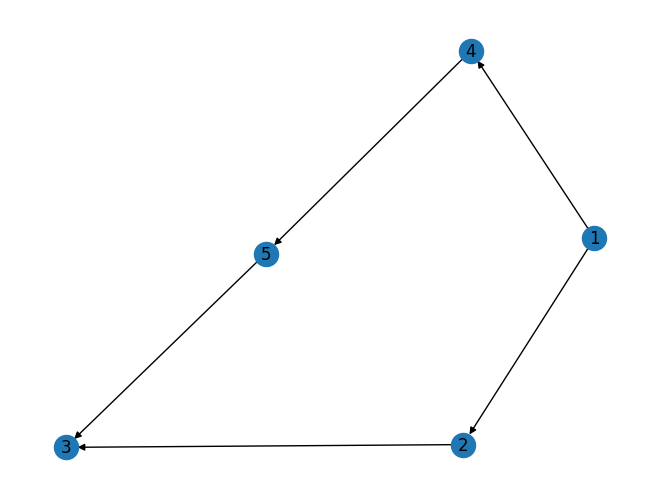

In [28]:
# Print hasse diagram
import matplotlib.pyplot as plt
import networkx as nx

def plot_hasse_diagram(relation: Relation):
    hasse_diagram = relation.get_hasse_diagram()
    G = nx.DiGraph()
    G.add_edges_from(hasse_diagram)
    nx.draw(G, with_labels=True)
    plt.show()
    
plot_hasse_diagram(relation_e)